In [165]:
import numpy as np
import matplotlib.pyplot as plt

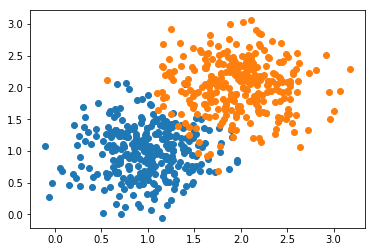

In [166]:
mean_1 = np.array([1,1])
mean_2 = np.array([2,2])
std = 0.4

N = 300
N_test = (int) (N * 2/3)

a_1 = np.random.normal(1, std, N)
a_2 = np.random.normal(1, std, N)
a = np.vstack((a_1, a_2, np.zeros(N)))
a_train = a[:, :N_test]
a_test = a[:, N_test:]

b_1 = np.random.normal(2, std, N)
b_2 = np.random.normal(2, std, N)
b = np.vstack((b_1, b_2, np.ones(N)))
b_train = b[:,:N_test]
b_test = b[:,N_test:]

data_train = np.vstack((a_train.T, b_train.T))
data_test = np.vstack((a_test.T, b_test.T))

X = np.array(data_train[:,:2])
Y = np.array(data_train[:,2])

X_test = np.array(data_test[:,:2])
Y_test = np.array(data_test[:,2])

plt.plot(a[0], a[1], 'o')
plt.plot(b[0], b[1], 'o')

In [167]:
def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis = 0)
    x = x - mean_x
    std_x = np.std(x, axis = 0)
    x = x / std_x
    return x, mean_x, std_x

In [168]:
X, mean_X, std_X = standardize(X)
X = np.column_stack((np.ones(X.shape[0]), X))
X_test, mean_X_test, std_X = standardize(X_test)
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

In [169]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_gradient(z):
    return (1 - sigmoid(z)) * sigmoid(z)

### logistic regression

In [170]:
def logistic_loss(y, x, w):
    return - np.mean(y * np.log(sigmoid(x @ w.T)) + (np.ones(y.shape[0])-y) * np.log(sigmoid(1 - x @ w.T)))

def logistic_gradient(y, x, w):
    return (1 / y.shape[0]) * x.T @ (pred(x, w) - y)

def pred(x, w):
    return sigmoid(x @ w.T)

In [186]:
def logistic_gradient_descent(y, tx, init_w, max_iter, gamma, batch_size = 1):
    w = init_w
    rand_list = np.arange(y.shape[0])
    for i in range(max_iter):
        if batch_size != 1:
            np.random.shuffle(rand_list)
            # randomizing y and tx so we can take the first *batch_size* elements
            y = y[rand_list]
            tx = tx[rand_list]
            
        grad = logistic_gradient(y, tx, w)
        w = w - gamma * grad
        
        loss = logistic_loss(y, tx, w)
    return loss, w

def classification(x):
    return np.where(x < 1/2, 0, 1)

In [187]:
loss, w = logistic_gradient_descent(Y, X, np.array([10,2,1]), 100, 0.5, batch_size = 20)
w

array([2.2319904 , 5.69660855, 4.94328239])

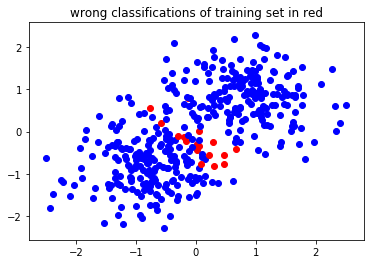

In [188]:
clas = classification(pred(X, w))
wrong = np.where(clas - Y != 0, 'red', 'blue')
plt.title('wrong classifications of training set in red')
for i in range(X.shape[0]):
    plt.scatter(X[i,1], X[i,2], color = wrong[i])

In [175]:
## correct precentage on train data
per_err = 100 - np.sum(np.abs(clas-Y))/Y.shape[0] * 100
print("correct percentage on training set: {} %".format(per_err))

correct percentage: 95.75 %


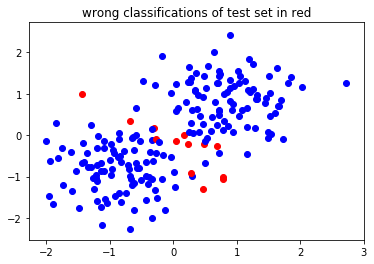

In [178]:
clas_test = classification(pred(X_test, w))
wrong_test = np.where(clas_test - Y_test != 0, 'red', 'blue')
plt.title('wrong classifications of test set in red')
for i in range(X_test.shape[0]):
    plt.scatter(X_test[i,1], X_test[i,2], color = wrong_test[i])

In [180]:
## correct precentage on train data
per_err = 100 - np.sum(np.abs(clas_test-Y_test))/Y_test.shape[0] * 100
print("correct percentage on test set: {} %".format(per_err))

correct percentage on test set: 93.5 %


### regularized logistic regression

In [201]:
def reg_logistic_loss(y, tx, w, gamma):
    return logistic_loss(y, tx, w) - (gamma / 2) * w.T @ w

def reg_logistic_gradient(y, tx, w, gamma):
    return logistic_gradient(y, tx, w) + gamma * w

def reg_gradient_descent(y, tx, init_w, max_iter, gamma, batch_size = 1):
    w = init_w
    rand_list = np.arange(y.shape[0])
    for i in range(max_iter):
        # since often 1, just to save randomization cost
        if batch_size != 1:
            np.random.shuffle(rand_list)
            # randomizing y and tx so we can take the first *batch_size* elements
            y = y[rand_list]
            tx = tx[rand_list]
            
        grad = reg_logistic_gradient(y, tx, w, gamma)
        w = w - gamma * grad
        
        loss = reg_logistic_loss(y, tx, w, gamma)
    return loss, w

In [213]:
loss, w_reg = reg_gradient_descent(Y, X, np.array([0,0,0]), 100, 0.1, 20)
w_reg

array([2.91166300e-04, 9.50737244e-01, 9.75628954e-01])

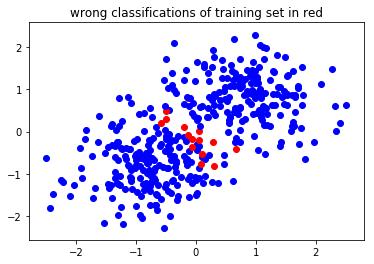

In [214]:
clas_reg = classification(pred(X, w_reg))
wrong_reg = np.where(clas - Y != 0, 'red', 'blue')
plt.title('wrong classifications of training set in red')
for i in range(X.shape[0]):
    plt.scatter(X[i,1], X[i,2], color = wrong_reg[i])

In [215]:
## correct precentage on train data
per_err = 100 - np.sum(np.abs(clas_reg-Y))/Y.shape[0] * 100
print("correct percentage on training set: {} %".format(per_err))

correct percentage on training set: 96.25 %


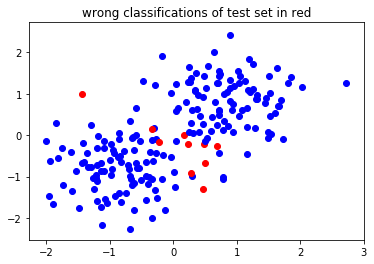

In [216]:
clas_test_reg = classification(pred(X_test, w_reg))
wrong_test_reg = np.where(clas_test_reg - Y_test != 0, 'red', 'blue')
plt.title('wrong classifications of test set in red')
for i in range(X_test.shape[0]):
    plt.scatter(X_test[i,1], X_test[i,2], color = wrong_test_reg[i])

In [217]:
## correct precentage on train data
per_err = 100 - np.sum(np.abs(clas_test_reg-Y_test))/Y_test.shape[0] * 100
print("correct percentage on test set: {} %".format(per_err))

correct percentage on test set: 95.0 %
